In [26]:
import os
import random
import numpy as np
import pandas as pd
from collections import Counter
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil

In [27]:
# Load and preprocess the data
photo_data = pd.read_json('photos.json', lines=True)
label_distribution = Counter(photo_data['label'])
print("Original Label Distribution:", label_distribution)

Original Label Distribution: Counter({'food': 108152, 'inside': 56031, 'outside': 18569, 'drink': 15670, 'menu': 1678})


In [28]:
target_size = 1678
sampled_data = photo_data.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=target_size, replace=True, random_state=42)
    if len(x) < target_size else x.sample(n=target_size, random_state=42)
).sample(frac=1, random_state=42).reset_index(drop=True)
new_label_distribution = Counter(sampled_data['label'])
print("Current Label Distribution:", new_label_distribution)

Current Label Distribution: Counter({'outside': 1678, 'food': 1678, 'menu': 1678, 'drink': 1678, 'inside': 1678})


C:\Users\jini\AppData\Local\Temp\ipykernel_1900\2475220725.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = photo_data.groupby('label', group_keys=False).apply(


In [29]:
def load_and_preprocess_images(sampled_data, img_size=(224, 224), sample_size=1000):  # Adjusted sample_size to 1000
    images = []
    labels = []
    problematic_indices = []

    for index, row in sampled_data.iterrows():
        img_path = os.path.join('photos', f"{row['photo_id']}.jpg")
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(row['label'])
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            problematic_indices.append(index)

    images_array = np.array(images)
    labels_array = np.array(labels)

    print(f"Total number of images loaded successfully: {len(images_array)}")

    return images_array, labels

Error loading image photos\ki0z-58NcxLiwB2lFerEMA.jpg: [Errno 2] No such file or directory: 'photos\\ki0z-58NcxLiwB2lFerEMA.jpg'
Error loading image photos\vejqfjsReeC16GzSeUIjBg.jpg: [Errno 2] No such file or directory: 'photos\\vejqfjsReeC16GzSeUIjBg.jpg'
Error loading image photos\c2xMnCb40P4szjnHQW7RHg.jpg: [Errno 2] No such file or directory: 'photos\\c2xMnCb40P4szjnHQW7RHg.jpg'
Error loading image photos\YQP1MseLyRjPOQ66pdi2uw.jpg: [Errno 2] No such file or directory: 'photos\\YQP1MseLyRjPOQ66pdi2uw.jpg'
Error loading image photos\JGL06eKEL5cYETc3wis1Eg.jpg: [Errno 2] No such file or directory: 'photos\\JGL06eKEL5cYETc3wis1Eg.jpg'
Error loading image photos\Y38EybhxeX-PHVHPKieMdQ.jpg: [Errno 2] No such file or directory: 'photos\\Y38EybhxeX-PHVHPKieMdQ.jpg'
Error loading image photos\qXedooX3y7RVx5ufaloyfQ.jpg: [Errno 2] No such file or directory: 'photos\\qXedooX3y7RVx5ufaloyfQ.jpg'
Error loading image photos\H8L9pWB_fGsSwg7AE5Vq4Q.jpg: [Errno 2] No such file or directory: 'phot

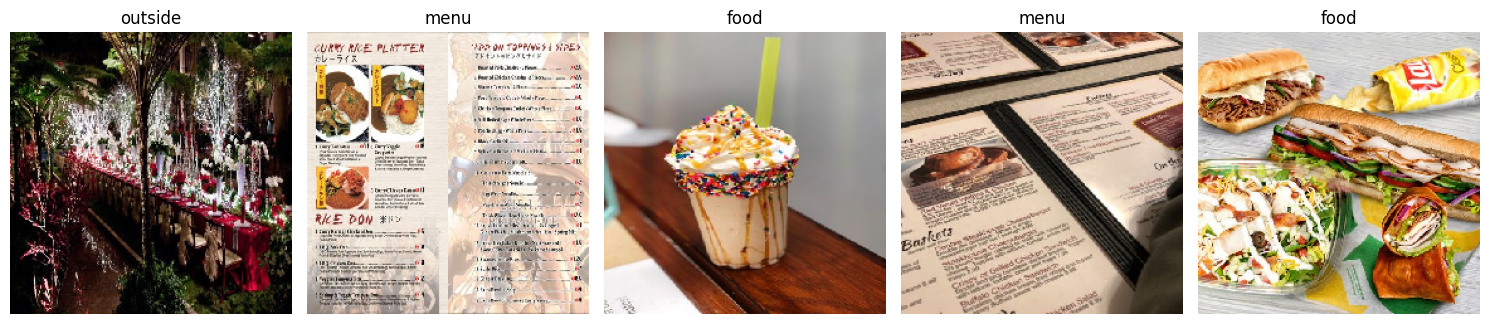

In [30]:
file_path = '/photos.json'
images_array, labels_array = load_and_preprocess_images(sampled_data)
num_images = 5
random_indices = np.random.choice(len(images_array), size=num_images, replace=False)
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images_array[i])
    plt.title(labels_array[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_array)
one_hot_labels = to_categorical(encoded_labels)
class_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Class Mapping:", class_mapping)

Class Mapping: {0: 'drink', 1: 'food', 2: 'inside', 3: 'menu', 4: 'outside'}


In [32]:
output_dir = 'classified_images'
os.makedirs(output_dir, exist_ok=True)

for class_name in label_encoder.classes_:
    class_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

for index, row in sampled_data.iterrows():
    img_path = os.path.join('photos', f"{row['photo_id']}.jpg")
    class_name = row['label']
    target_class_dir = os.path.join(output_dir, class_name)

    try:
        
        shutil.copy(img_path, target_class_dir)  
    except Exception as e:
        print(f"Error moving image {img_path} to {target_class_dir}: {e}")
print("Images have been classified and moved to respective directories.")


Error moving image photos\ki0z-58NcxLiwB2lFerEMA.jpg to classified_images\outside: [Errno 2] No such file or directory: 'photos\\ki0z-58NcxLiwB2lFerEMA.jpg'
Error moving image photos\vejqfjsReeC16GzSeUIjBg.jpg to classified_images\food: [Errno 2] No such file or directory: 'photos\\vejqfjsReeC16GzSeUIjBg.jpg'
Error moving image photos\c2xMnCb40P4szjnHQW7RHg.jpg to classified_images\outside: [Errno 2] No such file or directory: 'photos\\c2xMnCb40P4szjnHQW7RHg.jpg'
Error moving image photos\YQP1MseLyRjPOQ66pdi2uw.jpg to classified_images\food: [Errno 2] No such file or directory: 'photos\\YQP1MseLyRjPOQ66pdi2uw.jpg'
Error moving image photos\JGL06eKEL5cYETc3wis1Eg.jpg to classified_images\menu: [Errno 2] No such file or directory: 'photos\\JGL06eKEL5cYETc3wis1Eg.jpg'
Error moving image photos\Y38EybhxeX-PHVHPKieMdQ.jpg to classified_images\food: [Errno 2] No such file or directory: 'photos\\Y38EybhxeX-PHVHPKieMdQ.jpg'
Error moving image photos\qXedooX3y7RVx5ufaloyfQ.jpg to classified_ima

In [33]:
# Define the Generator model
def build_generator(noise_dim, num_classes):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=noise_dim + num_classes))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(224 * 224 * 3, activation='tanh'))  
    model.add(layers.Reshape((224, 224, 3)))  
    return model

# Define the Discriminator model
def build_discriminator(image_shape, num_classes):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=image_shape))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [34]:
# Parameters
noise_dim = 100
num_classes = 4  
image_shape = (224, 224, 3)  

In [35]:
# Build and compile the Discriminator
discriminator = build_discriminator(image_shape, num_classes)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
# Build the Generator
generator = build_generator(noise_dim, num_classes)

# Build the combined model
discriminator.trainable = False
noise = layers.Input(shape=(noise_dim,))
label = layers.Input(shape=(num_classes,))
input = layers.Concatenate()([noise, label])
generated_image = generator(input)
validity = discriminator(generated_image)

combined = tf.keras.Model([noise, label], validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')

# Function to generate labels
def generate_labels(batch_size, num_classes):
    labels = np.random.randint(0, num_classes, batch_size)
    return tf.keras.utils.to_categorical(labels, num_classes=num_classes)

In [37]:
# Function to load real images and labels
def get_real_images(batch_size, img_size=(224, 224, 3)):
    real_images = []
    real_labels = []
    all_files = os.listdir('photos')
    valid_image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    image_files = [f for f in all_files if f.lower().endswith(valid_image_extensions)]
    
    while len(real_images) < batch_size:
        img_name = random.choice(image_files)
        img_path = os.path.join('photos', img_name)
        try:
            img = load_img(img_path, target_size=img_size[:-1])  
            img_array = img_to_array(img) / 255.0  
            real_images.append(img_array)
            real_labels.append(get_label_from_filename(img_name))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    return np.array(real_images), np.array(real_labels)

def get_label_from_filename(filename):
    class_index = int(filename.split('.')[0])
    class_mapping = {
        0: 'drink',
        1: 'food',
        2: 'inside',
        3: 'menu',
        4: 'outside'
    }
    return class_mapping.get(class_index, -1)  


In [38]:

# Training the cGAN
def train_cgan(epochs, batch_size):
    for epoch in range(epochs):
        # Train Discriminator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        labels = generate_labels(batch_size, num_classes)
        generated_images = generator.predict(tf.concat([noise, labels], axis=1))
        
        real_images, real_labels = get_real_images(batch_size)  
        real_labels = tf.keras.utils.to_categorical(real_labels, num_classes=num_classes)
        
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        labels = generate_labels(batch_size, num_classes)
        g_loss = combined.train_on_batch([noise, labels], np.ones((batch_size, 1)))
        
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

# Start training
train_cgan(epochs=1000, batch_size=64)


2/2 [==============================] - 1s 110ms/step
Error loading image photos\22xWQ1n_PXyNSQmxQPDESA.jpg: invalid literal for int() with base 10: '22xWQ1n_PXyNSQmxQPDESA'
Error loading image photos\3kP781TUhGv8B78EjI_lWw.jpg: invalid literal for int() with base 10: '3kP781TUhGv8B78EjI_lWw'
Error loading image photos\8WCWyE3FhW9buhhzj8uaRQ.jpg: invalid literal for int() with base 10: '8WCWyE3FhW9buhhzj8uaRQ'
Error loading image photos\6AWhfZTmL_5dFGHi0vidWQ.jpg: invalid literal for int() with base 10: '6AWhfZTmL_5dFGHi0vidWQ'
Error loading image photos\3tZ7c0ED5PRLDpiR6NIo6g.jpg: invalid literal for int() with base 10: '3tZ7c0ED5PRLDpiR6NIo6g'
Error loading image photos\6srTj9EtuWFbwm9XaH0c2A.jpg: invalid literal for int() with base 10: '6srTj9EtuWFbwm9XaH0c2A'
Error loading image photos\6obcr-WIlt6EusI9tXIM8w.jpg: invalid literal for int() with base 10: '6obcr-WIlt6EusI9tXIM8w'
Error loading image photos\3V_784AJe10q3Py6HGnGPw.jpg: invalid literal for int() with base 10: '3V_784AJe10

1/1 [==============================] - 0s 418ms/step


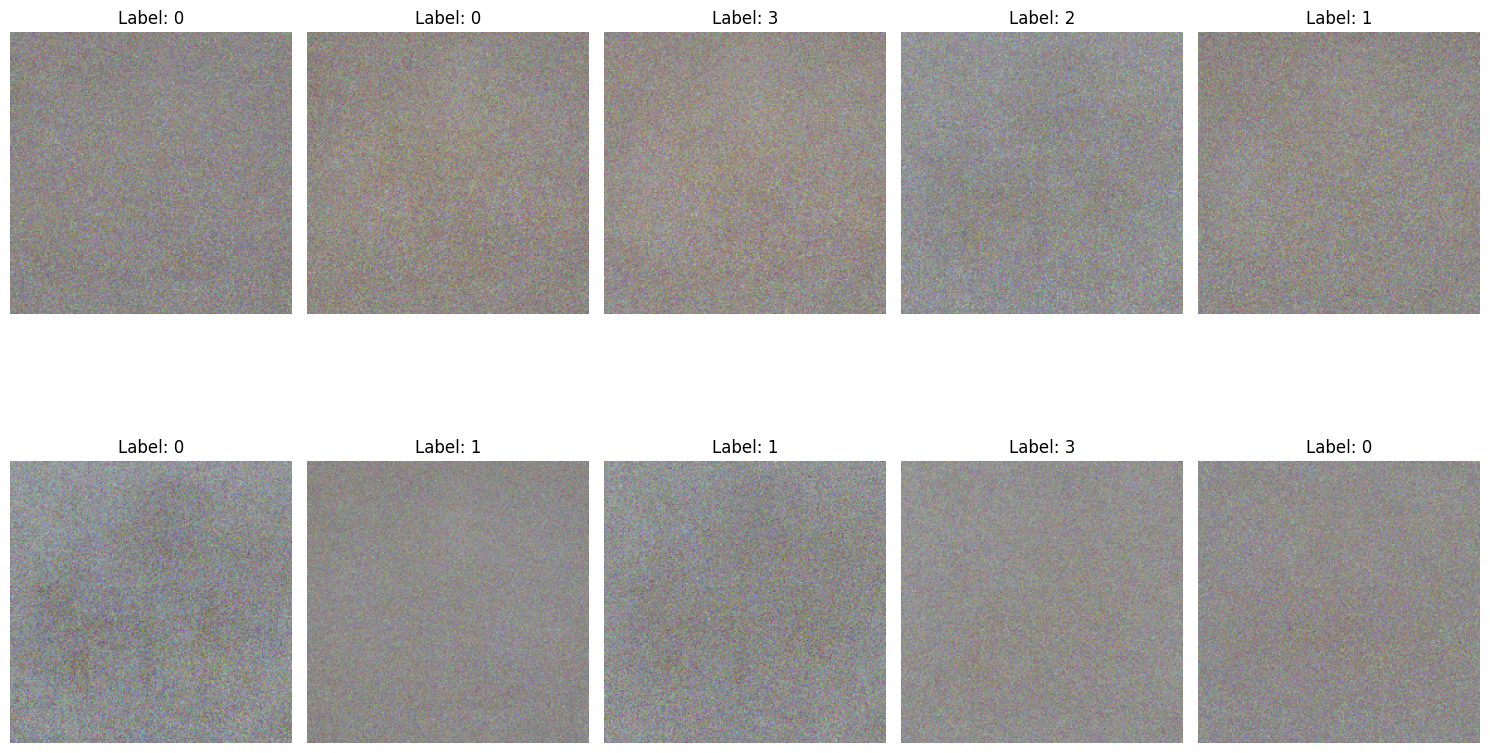

In [39]:
# Function to generate images
def generate_images(generator, num_images=10):
    noise = np.random.normal(0, 1, (num_images, noise_dim)).astype(np.float32)
    labels = np.random.randint(0, 4, num_images)  
    labels = to_categorical(labels, num_classes=4).astype(np.float32)
    
    generated_images = generator.predict(tf.concat([noise, labels], axis=1))
    generated_images = (generated_images + 1) / 2.0  
    generated_images = tf.reshape(generated_images, (num_images, 224, 224, 3))  
    
    # Plot generated images
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(generated_images[i])  # Display as RGB
        plt.title(f"Label: {np.argmax(labels[i])}")  # Display the label
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
generate_images(generator, num_images=10)


The CGAN successfully demonstrated its ability to generate class-specific outputs based on the provided conditioning labels. However, the current results reveal areas for improvement, including better feature differentiation across classes and mitigation of challenges like mode collapse. Future efforts will focus on optimizing the training process, refining the dataset, and implementing advanced GAN techniques to enhance stability and output quality. 

In [40]:
# Save the generator model
generator.save('cGan.h5')

# Load the generator model
from tensorflow.keras.models import load_model

generator = load_model('cGan.h5')

c:\Users\jini\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
